# PageRank Algorithm

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import warnings
warnings.filterwarnings('ignore')

## Function Definitions:

In [2]:
def dangling(G):
    dangling_nodes = 0
    for node in G.nodes():
        if G.out_degree(node) == 0:
            dangling_nodes += 1
    return dangling_nodes


In [77]:
def personalisation(G):
    """Return a personalisation vector for the given graph G."""
    personalization = {}
    for node in G.nodes():
        personalization[node] = 1.0 / len(G.nodes())
    return personalization

In [3]:
def node_transitions(G):
    # Get the number of nodes in the graph
    n = G.number_of_nodes()
    # Get the number of dangling nodes
    d = sum(1 for node in G.nodes() if G.out_degree(node) == 0)
    # Get the transition matrix
    A = nx.to_numpy_array(G, nodelist=range(n))
    # Add a transition from every dangling node to every other node
    for i in range(n):
        if G.out_degree(i) == 0:
            A[i] = 1/(n-d)
    # Normalize the rows of the transition matrix
    row_sums = A.sum(axis=1)
    A = A / row_sums[:, np.newaxis]
    # Compute the PageRank scores using the modified transition matrix
    scores = np.linalg.matrix_power(A, 100)[0]
    # Print the scores
    return scores

In [4]:
def mass_redistribution(G):
    # Get the number of nodes in the graph
    n = G.number_of_nodes()
    # Get the transition matrix
    A = nx.to_numpy_array(G, nodelist=range(n))
    # Get the dangling node mass
    dangling_mass = np.sum(A, axis=0)
    # Add a small value to avoid division by zero
    A += 1e-8
    # Normalize the rows of the transition matrix
    row_sums = A.sum(axis=1)
    A = A / row_sums[:, np.newaxis]
    # Add the dangling node mass to the transition matrix
    A += (dangling_mass / (n - 1)) * A
    # Normalize the rows of the transition matrix again
    row_sums = A.sum(axis=1)
    A = A / row_sums[:, np.newaxis]
    # Compute the PageRank scores using the modified transition matrix
    scores = np.linalg.matrix_power(A, 100)[0]
    # Print the scores
    return scores

In [5]:
def create_transition_matrix(G):
    n = G.number_of_nodes()
    transition_matrix = sp.dok_matrix((n, n), dtype=float)
    for i in G:
        if G.out_degree(i) > 0:
            for j in G[i]:
                transition_matrix[j, i] = 1.0 / G.out_degree(i)
    return transition_matrix

## Loading our Graphs

### Graph 1: Karate Club Graph

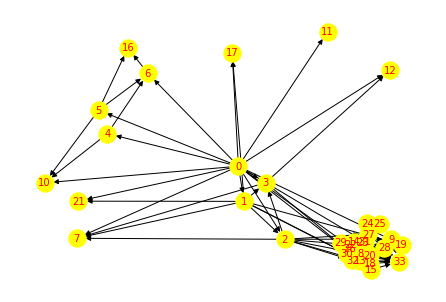

In [6]:
G = nx.karate_club_graph()
graph1 = nx.DiGraph()
graph1.add_edges_from((u, v) for u, v in G.edges())
nx.draw(graph1,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

In [7]:
print('Number of nodes: ', len(graph1.nodes()))
print('Number of edges: ', len(graph1.edges())) 

Number of nodes:  34
Number of edges:  78


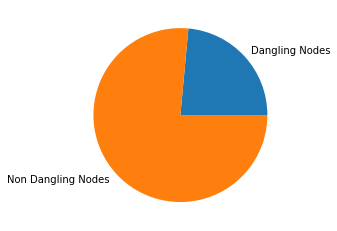

In [8]:
number_dangling = dangling(graph1)
number_nondangling = len(graph1.nodes()) - number_dangling
graphs=[number_dangling, number_nondangling]
mylabels = ["Dangling Nodes","Non Dangling Nodes"]
plt.pie(graphs, labels = mylabels)
plt.show() 

In [9]:
print("Number of Dangling Nodes:", number_dangling)
print("Number of Non Dangling Nodes:", number_nondangling)

Number of Dangling Nodes: 8
Number of Non Dangling Nodes: 26


### Graph 2: Davis Southern Woman Graph

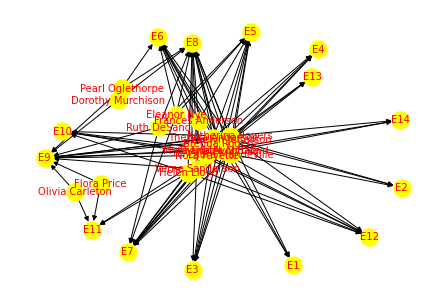

In [10]:
G = nx.davis_southern_women_graph()
graph2 = nx.DiGraph()
graph2.add_edges_from((u, v) for u, v in G.edges())
nx.draw(graph2,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

In [11]:
print('Number of nodes: ', len(graph2.nodes()))
print('Number of edges: ', len(graph2.edges())) 

Number of nodes:  32
Number of edges:  89


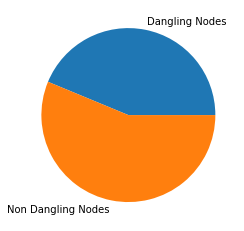

In [12]:
number_dangling = dangling(graph2)
number_nondangling = len(graph2.nodes()) - number_dangling
graphs=[number_dangling, number_nondangling]
mylabels = ["Dangling Nodes","Non Dangling Nodes"]
plt.pie(graphs, labels = mylabels)
plt.show() 

In [13]:
print("Number of Dangling Nodes:", number_dangling)
print("Number of Non Dangling Nodes:", number_nondangling)

Number of Dangling Nodes: 14
Number of Non Dangling Nodes: 18


### Graph 3: Florentine Families Graph

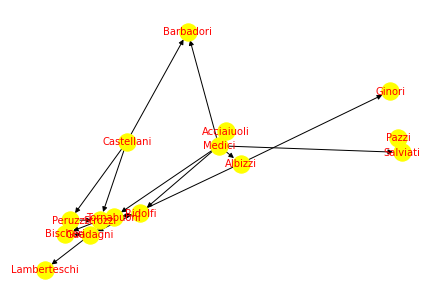

In [14]:
G = nx.florentine_families_graph()
graph3 = nx.DiGraph()
graph3.add_edges_from((u, v) for u, v in G.edges())
nx.draw(graph3,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

In [15]:
print('Number of nodes: ', len(graph3.nodes()))
print('Number of edges: ', len(graph3.edges())) 

Number of nodes:  15
Number of edges:  20


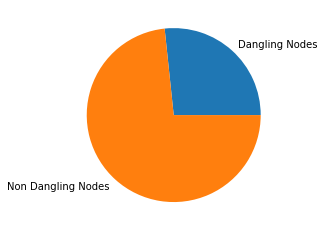

In [16]:
number_dangling = dangling(graph3)
number_nondangling = len(graph3.nodes()) - number_dangling
graphs=[number_dangling, number_nondangling]
mylabels = ["Dangling Nodes","Non Dangling Nodes"]
plt.pie(graphs, labels = mylabels)
plt.show() 

In [17]:
print("Number of Dangling Nodes:", number_dangling)
print("Number of Non Dangling Nodes:", number_nondangling)

Number of Dangling Nodes: 4
Number of Non Dangling Nodes: 11


## Making graphs appropriate for use

Relabelling nodes to integers..


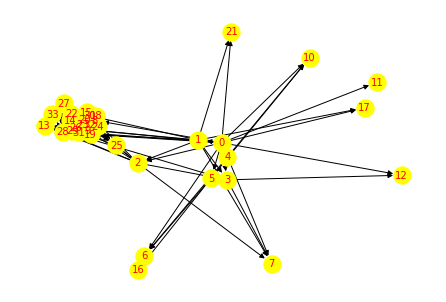

In [18]:
# labelling nodes as integers
print('Relabelling nodes to integers..')
n_unique_nodes = len(set(graph1.nodes()))
node2int = dict(zip(set(graph1.nodes()), range(n_unique_nodes)))
int2node = {v:k for k,v in node2int.items()}
graph1 = nx.relabel_nodes(graph1, node2int)
nx.draw(graph1,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

Relabelling nodes to integers..


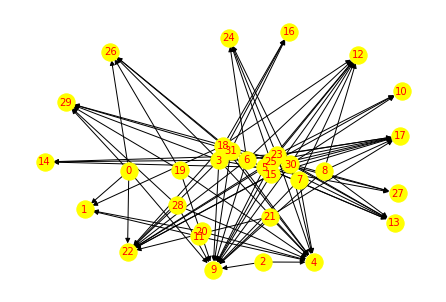

In [19]:
# labelling nodes as integers
print('Relabelling nodes to integers..')
n_unique_nodes = len(set(graph2.nodes()))
node2int = dict(zip(set(graph2.nodes()), range(n_unique_nodes)))
int2node = {v:k for k,v in node2int.items()}
graph2 = nx.relabel_nodes(graph2, node2int)
nx.draw(graph2,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

Relabelling nodes to integers..


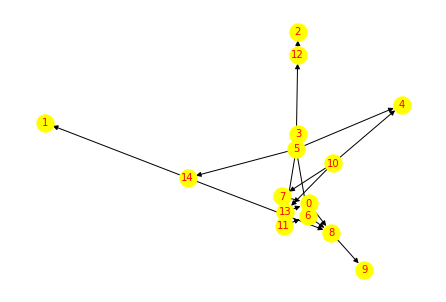

In [20]:
# labelling nodes as integers
print('Relabelling nodes to integers..')
n_unique_nodes = len(set(graph3.nodes()))
node2int = dict(zip(set(graph3.nodes()), range(n_unique_nodes)))
int2node = {v:k for k,v in node2int.items()}
graph3 = nx.relabel_nodes(graph3, node2int)
nx.draw(graph3,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

## Pagerank:

### Karate club graph

In [21]:
#Page rank by networkx library
pagerank=nx.pagerank(graph1) 
# Using pagerank function from networkx library
#sorting both dictionaries based on items in descending order
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)
print("\n\nThe order generated is\n")
for i in pagerank_sorted:
  print(i[0],end=" ")



The order generated is

33 32 31 16 10 6 13 7 29 27 25 30 12 3 8 21 19 17 2 28 9 11 5 4 1 26 24 23 22 20 18 15 14 0 

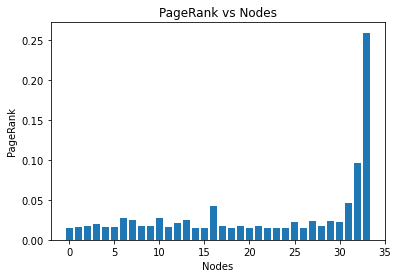

In [22]:
keys = [x[0] for x in pagerank_sorted]
values = [x[1] for x in pagerank_sorted]
# Plot the values against the keys
plt.bar(keys, values)
plt.title("PageRank vs Nodes")
plt.xlabel("Nodes")
plt.ylabel("PageRank")
plt.show()

### Davis Southern Woman Graph

In [23]:
#Page rank by networkx library
pagerank=nx.pagerank(graph2) 
# Using pagerank function from networkx library
#sorting both dictionaries based on items in descending order
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)
print("\n\nThe order generated is\n")
for i in pagerank_sorted:
  print(i[0],end=" ")



The order generated is

4 9 22 17 12 1 29 13 26 24 27 16 14 10 31 30 28 25 23 21 20 19 18 15 11 8 7 6 5 3 2 0 

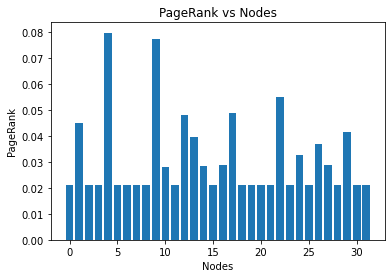

In [24]:
keys = [x[0] for x in pagerank_sorted]
values = [x[1] for x in pagerank_sorted]
# Plot the values against the keys
plt.bar(keys, values)
plt.title("PageRank vs Nodes")
plt.xlabel("Nodes")
plt.ylabel("PageRank")
plt.show()

### Florentine Families Graph

In [25]:
#Page rank by networkx library
pagerank=nx.pagerank(graph3) 
# Using pagerank function from networkx library
#sorting both dictionaries based on items in descending order
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)
print("\n\nThe order generated is\n")
for i in pagerank_sorted:
  print(i[0],end=" ")



The order generated is

9 8 6 0 2 11 5 13 4 1 14 12 7 10 3 

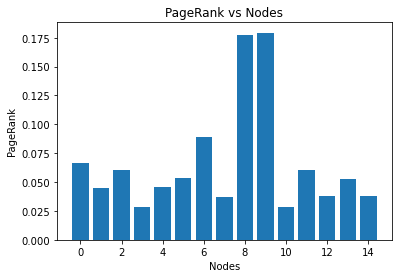

In [26]:
keys = [x[0] for x in pagerank_sorted]
values = [x[1] for x in pagerank_sorted]
# Plot the values against the keys
plt.bar(keys, values)
plt.title("PageRank vs Nodes")
plt.xlabel("Nodes")
plt.ylabel("PageRank")
plt.show()

## Handling Dangling Nodes:

- Dangling node problem:
    -  Using teleportation
    -  Using personalisation vector
    -  Dangling node transition
    -  Dangling node mass redistribution

### Using Teleportation: 

One way to handle the dangling node problem is to add a probability of "teleportation" to the random walker. This means that the random walker can jump to any node with a certain probability, even if it has no outgoing edges. This probability is often set to a small value, such as 0.1, to ensure that the random walker can explore the graph effectively. NetworkX library's pagerank function accepts the alpha parameter, which represents the probability of teleportation.

In this example, the alpha parameter is set to teleportation_prob, which is a value between 0 and 1. This value represents the probability of teleportation, which is used to handle the dangling node problem.

Another way is by passing the personalization vector to the pagerank() function, you can define a dictionary that assigns a probability to each node to be the starting point

In [27]:
# Set the teleportation probability
teleportation_prob = 0.1

#### Graph 1

In [28]:
# Compute the PageRank scores
scores = nx.pagerank(graph1, alpha=teleportation_prob)
# Print the scores
print(scores)

{0: 0.027232940830046154, 1: 0.027403147426529155, 2: 0.027745688190334537, 3: 0.02809251062182429, 4: 0.027403147426529155, 5: 0.027403147426529155, 6: 0.029686752518565018, 7: 0.02902893064906617, 8: 0.027749969858018912, 10: 0.029686752518565018, 11: 0.027403147426529155, 12: 0.028339567453771038, 13: 0.02902893064906617, 17: 0.027745688190334537, 19: 0.027745688190334537, 21: 0.027745688190334537, 31: 0.03255845674090241, 30: 0.028500483840601748, 9: 0.027579763261535908, 27: 0.029032192884857522, 28: 0.027579763261535908, 32: 0.04036759383075808, 16: 0.031115064587136854, 33: 0.05813683222190123, 14: 0.027232940830046154, 15: 0.027232940830046154, 18: 0.027232940830046154, 20: 0.027232940830046154, 22: 0.027232940830046154, 23: 0.027232940830046154, 25: 0.02868537045336777, 29: 0.029139254710655774, 24: 0.027232940830046154, 26: 0.027232940830046154}


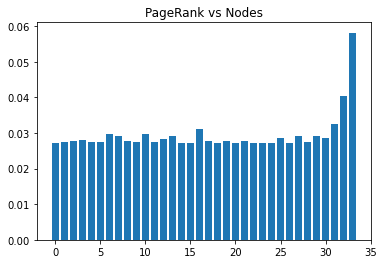

In [29]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 2

In [30]:
# Compute the PageRank scores
scores = nx.pagerank(graph2, alpha=teleportation_prob)
# Print the scores
print(scores)

{23: 0.029585815477371217, 14: 0.030800934335163663, 10: 0.030748103080477034, 13: 0.03265002824919565, 24: 0.03148774064608983, 17: 0.03412930338042123, 12: 0.034006030452819094, 9: 0.038841851298468455, 4: 0.03925393508502416, 5: 0.029585815477371217, 22: 0.03514366347040449, 30: 0.029585815477371217, 6: 0.029585815477371217, 25: 0.029585815477371217, 8: 0.029585815477371217, 15: 0.029585815477371217, 7: 0.029585815477371217, 21: 0.029585815477371217, 28: 0.029585815477371217, 29: 0.032942361191794986, 19: 0.029585815477371217, 26: 0.03220272362618219, 31: 0.029585815477371217, 16: 0.030871376008079168, 27: 0.030871376008079168, 3: 0.029585815477371217, 18: 0.029585815477371217, 1: 0.033505894575119016, 0: 0.029585815477371217, 2: 0.029585815477371217, 20: 0.029585815477371217, 11: 0.029585815477371217}


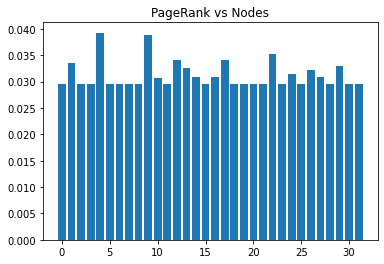

In [31]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 3

In [32]:
# Compute the PageRank scores
scores = nx.pagerank(graph3, alpha=teleportation_prob)
# Print the scores
print(scores)

{3: 0.06178606949794239, 5: 0.06796464826337448, 4: 0.06520487595061727, 11: 0.06649721315226337, 6: 0.06979505586831275, 14: 0.06314534969547325, 12: 0.06314534969547325, 10: 0.06178606949794239, 7: 0.06384559575308642, 13: 0.06703785550617283, 0: 0.06833019270781893, 8: 0.07875598900411522, 1: 0.06494331888065843, 2: 0.06810056826337449, 9: 0.06966184826337449}


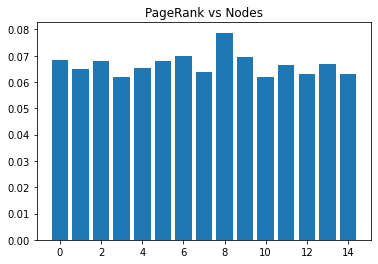

In [33]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

### Using Personalisation Vector

#### Graph 1

In [35]:
p = {0:0.03, 1:0.03,2:0.03,3:0.03,4:0.03,5:0.03,6:0.03,7:0.04,8:0.02,9:0.01,10:0.05,11:0.03,12:0.03,13:0.03,0:0.03, 14:0.03,15:0.03,16:0.03,17:0.03,18:0.03,19:0.03,20:0.04,21:0.02,22:0.01,23:0.05,24:0.03,25:0.03,26:0.03}

# Calculate the PageRank using the personalization vector
pr = nx.pagerank(graph1, personalization=p)

# Print the PageRank
print(pr)

{0: 0.019097971516278837, 1: 0.020112540232612778, 2: 0.022249481323962723, 3: 0.024613483495440267, 4: 0.020112540232612778, 5: 0.020112540232612778, 6: 0.03435881417494573, 7: 0.03795330632427367, 8: 0.016110551898664043, 10: 0.04709079518579829, 11: 0.020112540232612778, 12: 0.027086372556019908, 13: 0.0315873158188474, 17: 0.022249481323962723, 19: 0.022249481323962723, 21: 0.01588349081853644, 31: 0.032862686671527794, 30: 0.006701599483156465, 9: 0.008729992676903824, 27: 0.01318606847903958, 28: 0.0023640021714775436, 32: 0.0727817185532795, 16: 0.05400193409748357, 33: 0.20579390783203727, 14: 0.019097971516278837, 15: 0.019097971516278837, 18: 0.019097971516278837, 20: 0.025463962021705117, 22: 0.006365990505426279, 23: 0.031829952527131396, 25: 0.029920037823840874, 29: 0.013527582884452544, 24: 0.019097971516278837, 26: 0.019097971516278837}


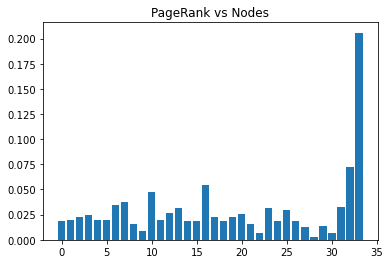

In [36]:
lists = sorted(pr.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 2

In [37]:
p = personalisation(graph2)
print(p)
# Compute the PageRank scores
scores = nx.pagerank(graph2, personalization=p)
# Print the scores
print(scores)

{23: 0.03125, 14: 0.03125, 10: 0.03125, 13: 0.03125, 24: 0.03125, 17: 0.03125, 12: 0.03125, 9: 0.03125, 4: 0.03125, 5: 0.03125, 22: 0.03125, 30: 0.03125, 6: 0.03125, 25: 0.03125, 8: 0.03125, 15: 0.03125, 7: 0.03125, 21: 0.03125, 28: 0.03125, 29: 0.03125, 19: 0.03125, 26: 0.03125, 31: 0.03125, 16: 0.03125, 27: 0.03125, 3: 0.03125, 18: 0.03125, 1: 0.03125, 0: 0.03125, 2: 0.03125, 20: 0.03125, 11: 0.03125}
{23: 0.021141491359371573, 14: 0.028522307192211382, 10: 0.028201402156000956, 13: 0.0397539834595763, 24: 0.032694072662946924, 17: 0.04873932447346825, 12: 0.047990546055643915, 9: 0.07736405370343828, 4: 0.0798671129858796, 5: 0.021141491359371573, 22: 0.05490070116870843, 30: 0.021141491359371573, 6: 0.021141491359371573, 25: 0.021141491359371573, 8: 0.021141491359371573, 15: 0.021141491359371573, 7: 0.021141491359371573, 21: 0.021141491359371573, 28: 0.021141491359371573, 29: 0.041529657993274, 19: 0.021141491359371573, 26: 0.03703698748632803, 31: 0.021141491359371573, 16: 0.02895

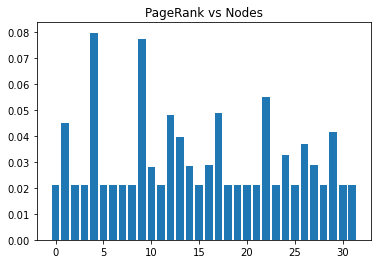

In [38]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 3

In [39]:
p = personalisation(graph3)
print(p)
# Compute the PageRank scores
scores = nx.pagerank(graph3, personalization=p)
# Print the scores
print(scores)

{3: 0.06666666666666667, 5: 0.06666666666666667, 4: 0.06666666666666667, 11: 0.06666666666666667, 6: 0.06666666666666667, 14: 0.06666666666666667, 12: 0.06666666666666667, 10: 0.06666666666666667, 7: 0.06666666666666667, 13: 0.06666666666666667, 0: 0.06666666666666667, 8: 0.06666666666666667, 1: 0.06666666666666667, 2: 0.06666666666666667, 9: 0.06666666666666667}
{3: 0.028760095160555416, 5: 0.05320653296443452, 4: 0.04595406467146415, 11: 0.06015830301694288, 6: 0.08893928583705077, 14: 0.03780525207017112, 12: 0.03780525207017112, 10: 0.028760095160555416, 7: 0.03690890776184845, 13: 0.052595351121154564, 0: 0.06679958946663331, 8: 0.17720378812222642, 1: 0.04482737381861387, 2: 0.06089465247667231, 9: 0.17938145628150626}


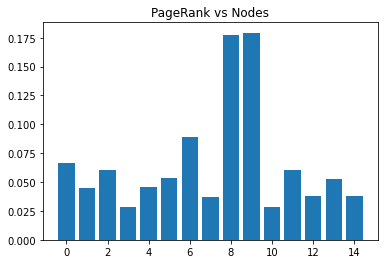

In [40]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

### Using Dangling node transition

A third way to handle the problem is to add a transition from every dangling node to every other node in the graph with a probability of 1/(n-d), where n is the total number of nodes in the graph, and d is the number of dangling nodes.

#### Graph 1

In [41]:
g1 = node_transitions(graph1)
print(g1)

[0.01337704 0.01421311 0.01598975 0.01798847 0.01421311 0.01421311
 0.02605737 0.02398462 0.01621183 0.01537576 0.02605737 0.01421311
 0.02020926 0.02398462 0.01337704 0.01337704 0.04417211 0.01598975
 0.01337704 0.01598975 0.01337704 0.01598975 0.01337704 0.01337704
 0.01337704 0.02051147 0.01337704 0.02251019 0.01537576 0.02274097
 0.02055763 0.04687147 0.10198276 0.29420352]


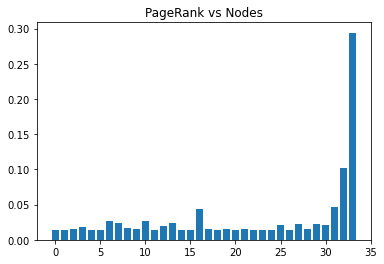

In [42]:
plt.bar(np.arange(0, 34, 1), g1)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 2

In [43]:
g2 = node_transitions(graph2)
print(g2)

[0.02       0.0465     0.02       0.02       0.08535714 0.02
 0.02       0.02       0.02       0.08257143 0.02785714 0.02
 0.04988095 0.04071429 0.02821429 0.02       0.02869048 0.05071429
 0.02       0.02       0.02       0.02       0.05757143 0.02
 0.03285714 0.02       0.03769048 0.02869048 0.02       0.04269048
 0.02       0.02      ]


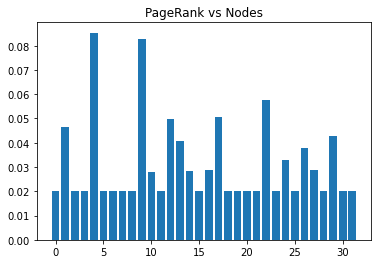

In [44]:
plt.bar(np.arange(0, 32, 1), g2)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 3

In [45]:
scores = node_transitions(graph3)
print(scores)

[0.06324111 0.04031621 0.056917   0.02371542 0.04110672 0.04743083
 0.09011858 0.03162055 0.19367589 0.2173913  0.02371542 0.056917
 0.03320158 0.04743083 0.03320158]


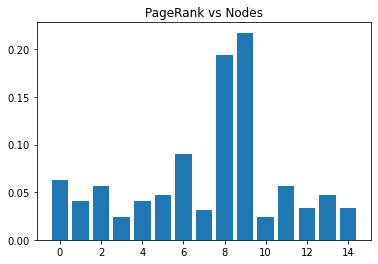

In [46]:
plt.bar(np.arange(0, 15, 1), scores)
plt.title("PageRank vs Nodes")
plt.show()

### Using Dangling Node Mass Redistribution

#### Graph 1:

In [47]:
scores = mass_redistribution(graph1)
print(scores)

[0.01281271 0.01397201 0.01609881 0.01853679 0.01397201 0.01397201
 0.02648076 0.025344   0.01630602 0.0150691  0.02648076 0.01397201
 0.02033513 0.025344   0.01281271 0.01281271 0.04464027 0.01609881
 0.01281271 0.01609881 0.01281271 0.01609881 0.01281271 0.01281271
 0.01281271 0.01998374 0.01281271 0.02253271 0.0150691  0.02110729
 0.01972922 0.0459868  0.09850962 0.302947  ]


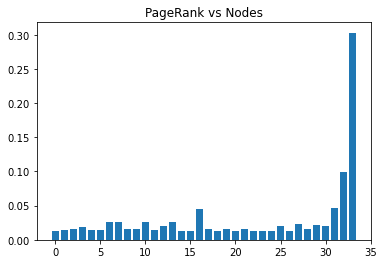

In [48]:
plt.bar(np.arange(0, 34, 1), scores)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 2:

In [49]:
scores = mass_redistribution(graph2)
print(scores)

[0.01891397 0.04395488 0.01891397 0.01891397 0.09206748 0.01891397
 0.01891397 0.01891397 0.01891397 0.0928923  0.02729108 0.01891397
 0.05141987 0.04126894 0.02761828 0.01891397 0.02808506 0.05238827
 0.01891397 0.01891397 0.01891397 0.01891397 0.0618284  0.01891397
 0.03243983 0.01891397 0.03747614 0.02808506 0.01891397 0.04273291
 0.01891397 0.01891397]


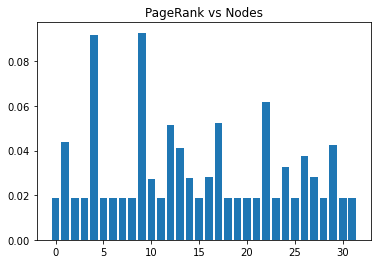

In [50]:
plt.bar(np.arange(0, 32, 1), scores)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 3:

In [51]:
scores = mass_redistribution(graph3)
print(scores)

[0.06368778 0.03829815 0.0552853  0.02175551 0.04151368 0.04506499
 0.09191305 0.03025273 0.19900537 0.22231482 0.02175551 0.05780551
 0.03197582 0.04739594 0.03197582]


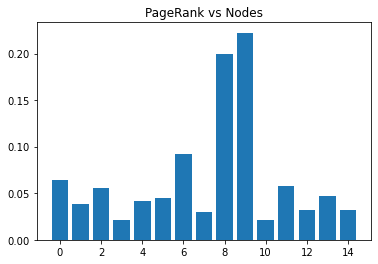

In [52]:
plt.bar(np.arange(0, 15, 1), scores)
plt.title("PageRank vs Nodes")
plt.show()

## Handling Convergence Issues

- Using Damping Factor
- Increasing the number of Iterations
- Using a stopping ctriterion

### Using Damping factor

To deal with convergence issues using the damping factor in the PageRank algorithm when using a Markov chain in Python, you can use the pagerank() function from the NetworkX library and set the alpha parameter, which corresponds to the damping factor.

Here's an example of how to use a damping factor of 0.85 in the PageRank algorithm:

In this example, the damping factor is set to 0.85. You can adjust this value to suit the specific needs of your graph. A higher damping factor will cause the random walker to move more slowly, which can help the algorithm converge faster. A lower damping factor will cause the random walker to move more quickly, which can help the algorithm explore the graph more thoroughly but may make it converge slower.

It's important to note that different graphs may require different damping factors to achieve convergence, so it may be necessary to experiment with different values to find the one that works best for your specific use case.

#### Graph 1:

In [53]:
# Set the damping factor
damping_factor = 0.85
# Compute the PageRank scores
scores = nx.pagerank(graph1, alpha=damping_factor)
# Print the scores
print(scores)

{0: 0.015060398201356053, 1: 0.01586047829183153, 2: 0.017545657516999914, 3: 0.019409903871309163, 4: 0.01586047829183153, 5: 0.01586047829183153, 6: 0.02709500645962076, 7: 0.02490945458306441, 8: 0.017724724646140777, 10: 0.02709500645962076, 11: 0.01586047829183153, 12: 0.021360029003586772, 13: 0.02490945458306441, 17: 0.017545657516999914, 19: 0.017545657516999914, 21: 0.017545657516999914, 31: 0.04592580168141822, 30: 0.021767615793904047, 9: 0.0169246445556653, 27: 0.023751994661056024, 28: 0.0169246445556653, 32: 0.09548948104425681, 16: 0.04258589015733158, 33: 0.2590491773753372, 14: 0.015060398201356053, 15: 0.015060398201356053, 18: 0.015060398201356053, 20: 0.015060398201356053, 22: 0.015060398201356053, 23: 0.015060398201356053, 25: 0.021887748306746776, 29: 0.024021295214681375, 24: 0.015060398201356053, 26: 0.015060398201356053}


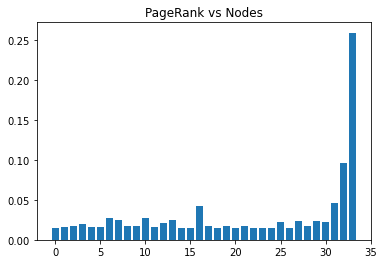

In [54]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 2

In [55]:
# Set the damping factor
damping_factor = 0.85
# Compute the PageRank scores
scores = nx.pagerank(graph2, alpha=damping_factor)
# Print the scores
print(scores)

{23: 0.021141491359371573, 14: 0.028522307192211382, 10: 0.028201402156000956, 13: 0.0397539834595763, 24: 0.032694072662946924, 17: 0.04873932447346825, 12: 0.047990546055643915, 9: 0.07736405370343828, 4: 0.0798671129858796, 5: 0.021141491359371573, 22: 0.05490070116870843, 30: 0.021141491359371573, 6: 0.021141491359371573, 25: 0.021141491359371573, 8: 0.021141491359371573, 15: 0.021141491359371573, 7: 0.021141491359371573, 21: 0.021141491359371573, 28: 0.021141491359371573, 29: 0.041529657993274, 19: 0.021141491359371573, 26: 0.03703698748632803, 31: 0.021141491359371573, 16: 0.028950180573825285, 27: 0.028950180573825285, 3: 0.021141491359371573, 18: 0.021141491359371573, 1: 0.04495264504618522, 0: 0.021141491359371573, 2: 0.021141491359371573, 20: 0.021141491359371573, 11: 0.021141491359371573}


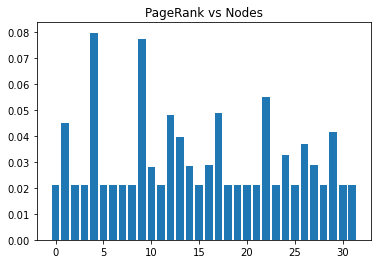

In [56]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 3:

In [57]:
# Set the damping factor
damping_factor = 0.85
# Compute the PageRank scores
scores = nx.pagerank(graph3, alpha=damping_factor)
# Print the scores
print(scores)

{3: 0.028760095160555398, 5: 0.0532065329644345, 4: 0.04595406467146412, 11: 0.06015830301694285, 6: 0.08893928583705071, 14: 0.037805252070171096, 12: 0.037805252070171096, 10: 0.028760095160555398, 7: 0.03690890776184843, 13: 0.05259535112115454, 0: 0.06679958946663325, 8: 0.17720378812222637, 1: 0.04482737381861385, 2: 0.06089465247667229, 9: 0.17938145628150623}


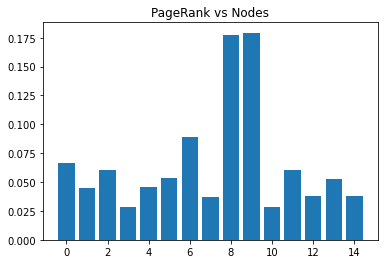

In [58]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

### By Increasing the number of iterations

To deal with convergence issues by increasing the number of iterations in the PageRank algorithm when using a Markov chain in Python, you can use the pagerank() function from the NetworkX library and set the max_iter parameter.

Here's an example of how to increase the number of iterations to 1000:
In this example, the number of iterations is set to 1000, you can adjust this value to suit the specific needs of your graph.
Increasing the number of iterations will give the random walker more time to explore the graph, which can help the algorithm converge to the correct PageRank scores. However, it also increases the computational cost of the algorithm, so you should be careful to set the number of iterations high enough to achieve convergence but not so high that the algorithm takes an unreasonable amount of time to run.

It's important to note that different graphs may require different number of iterations to achieve convergence, so it may be necessary to experiment with different values to find the one that works best for your specific use case.

#### Graph 1

In [59]:
# Set the number of iterations
max_iter = 1000
# Compute the PageRank scores
scores = nx.pagerank(graph1, max_iter=max_iter)
# Print the scores
print(scores)

{0: 0.015060398201356053, 1: 0.01586047829183153, 2: 0.017545657516999914, 3: 0.019409903871309163, 4: 0.01586047829183153, 5: 0.01586047829183153, 6: 0.02709500645962076, 7: 0.02490945458306441, 8: 0.017724724646140777, 10: 0.02709500645962076, 11: 0.01586047829183153, 12: 0.021360029003586772, 13: 0.02490945458306441, 17: 0.017545657516999914, 19: 0.017545657516999914, 21: 0.017545657516999914, 31: 0.04592580168141822, 30: 0.021767615793904047, 9: 0.0169246445556653, 27: 0.023751994661056024, 28: 0.0169246445556653, 32: 0.09548948104425681, 16: 0.04258589015733158, 33: 0.2590491773753372, 14: 0.015060398201356053, 15: 0.015060398201356053, 18: 0.015060398201356053, 20: 0.015060398201356053, 22: 0.015060398201356053, 23: 0.015060398201356053, 25: 0.021887748306746776, 29: 0.024021295214681375, 24: 0.015060398201356053, 26: 0.015060398201356053}


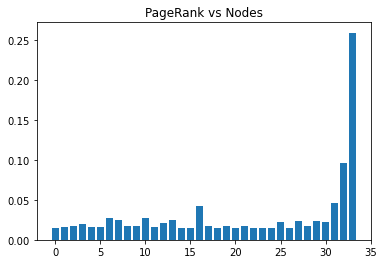

In [60]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 2:

In [61]:
# Set the number of iterations
max_iter = 1000
# Compute the PageRank scores
scores = nx.pagerank(graph2, max_iter=max_iter)
# Print the scores
print(scores)

{23: 0.021141491359371573, 14: 0.028522307192211382, 10: 0.028201402156000956, 13: 0.0397539834595763, 24: 0.032694072662946924, 17: 0.04873932447346825, 12: 0.047990546055643915, 9: 0.07736405370343828, 4: 0.0798671129858796, 5: 0.021141491359371573, 22: 0.05490070116870843, 30: 0.021141491359371573, 6: 0.021141491359371573, 25: 0.021141491359371573, 8: 0.021141491359371573, 15: 0.021141491359371573, 7: 0.021141491359371573, 21: 0.021141491359371573, 28: 0.021141491359371573, 29: 0.041529657993274, 19: 0.021141491359371573, 26: 0.03703698748632803, 31: 0.021141491359371573, 16: 0.028950180573825285, 27: 0.028950180573825285, 3: 0.021141491359371573, 18: 0.021141491359371573, 1: 0.04495264504618522, 0: 0.021141491359371573, 2: 0.021141491359371573, 20: 0.021141491359371573, 11: 0.021141491359371573}


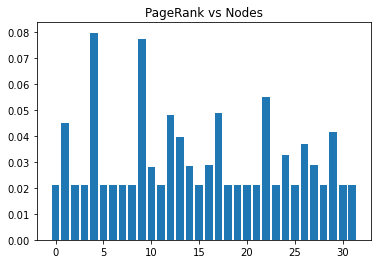

In [62]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

#### Graph 3:

In [63]:
# Set the number of iterations
max_iter = 1000
# Compute the PageRank scores
scores = nx.pagerank(graph3, max_iter=max_iter)
# Print the scores
print(scores)

{3: 0.028760095160555398, 5: 0.0532065329644345, 4: 0.04595406467146412, 11: 0.06015830301694285, 6: 0.08893928583705071, 14: 0.037805252070171096, 12: 0.037805252070171096, 10: 0.028760095160555398, 7: 0.03690890776184843, 13: 0.05259535112115454, 0: 0.06679958946663325, 8: 0.17720378812222637, 1: 0.04482737381861385, 2: 0.06089465247667229, 9: 0.17938145628150623}


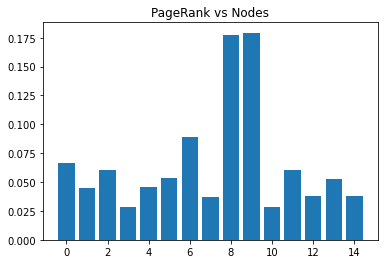

In [64]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

### Using a stopping criterion

To deal with convergence issues using a stopping criterion in the PageRank algorithm when using a Markov chain in Python, you can use the pagerank() function from the NetworkX library and set the tol parameter.

The tol parameter in the pagerank() function controls the stopping criterion for the algorithm. The algorithm stops when the difference between the PageRank scores of two consecutive iterations is less than the value of the tol parameter.
Here's an example of how to set the tolerance to 1e-8:

In this example, the tolerance is set to 1e-8, you can adjust this value to suit the specific needs of your graph.
A smaller tolerance value will cause the algorithm to stop when the difference between the PageRank scores of two consecutive iterations is smaller, this will make the algorithm converge more quickly, but it will also increase the computational cost of the algorithm.

It's important to note that different graphs may require different tolerance values to achieve convergence, so it may be necessary to experiment with different values to find the one that works best for your specific use case.

#### Graph 1:

In [65]:
# Set the tolerance
tol = 1e-8
# Compute the PageRank scores
scores = nx.pagerank(graph1, tol=tol)
# Print the scores
print(scores)

{0: 0.01506049600311933, 1: 0.01586058477528059, 2: 0.01754577168413414, 3: 0.019410009606555968, 4: 0.01586058477528059, 5: 0.01586058477528059, 6: 0.02709516416763761, 7: 0.024909511408303782, 8: 0.017724822697702414, 10: 0.02709516416763761, 11: 0.01586058477528059, 12: 0.021360086577028398, 13: 0.024909511408303782, 17: 0.01754577168413414, 19: 0.01754577168413414, 21: 0.01754577168413414, 31: 0.04592546239026375, 30: 0.021767715344205293, 9: 0.016924733925541155, 27: 0.023752158114650576, 28: 0.016924733925541155, 32: 0.09548933284323116, 16: 0.04258521042119856, 33: 0.25904708269291166, 14: 0.01506049600311933, 15: 0.01506049600311933, 18: 0.01506049600311933, 20: 0.01506049600311933, 22: 0.01506049600311933, 23: 0.01506049600311933, 25: 0.02188792019222875, 29: 0.024021490251325443, 24: 0.01506049600311933, 26: 0.01506049600311933}


In [78]:
# Create a directed graph
G = graph1
# Define the stopping criterion
tol = 1e-8
# Initialize the pagerank scores and the number of iterations
scores = dict.fromkeys(G, 1/G.number_of_nodes())
iterations = []
# Iterate until convergence
while True:
    new_scores = nx.pagerank(G, personalization=scores, alpha=0.85)
    if max([abs(new_scores[n] - scores[n]) for n in G]) < tol:
        break
    scores = new_scores
    iterations.append(len(iterations) + 1)

print("Number of iterations",len(iterations))


Number of iterations 26541


#### Graph 2:

In [66]:
# Set the tolerance
tol = 1e-8
# Compute the PageRank scores
scores = nx.pagerank(graph2, tol=tol)
# Print the scores
print(scores)

{23: 0.021141647164756302, 14: 0.028522349234934245, 10: 0.028201449144926508, 13: 0.03975385238520503, 24: 0.032694050405034814, 17: 0.048739054905421644, 12: 0.047990288028736935, 9: 0.07736334293411175, 4: 0.0798663636361721, 5: 0.021141647164756302, 22: 0.05490033663357019, 30: 0.021141647164756302, 6: 0.021141647164756302, 25: 0.021141647164756302, 8: 0.021141647164756302, 15: 0.021141647164756302, 7: 0.021141647164756302, 21: 0.021141647164756302, 28: 0.021141647164756302, 29: 0.0415294995499145, 19: 0.021141647164756302, 26: 0.03703689828980619, 31: 0.021141647164756302, 16: 0.028950216021611228, 27: 0.028950216021611228, 3: 0.021141647164756302, 18: 0.021141647164756302, 1: 0.044952433843330364, 0: 0.021141647164756302, 2: 0.021141647164756302, 20: 0.021141647164756302, 11: 0.021141647164756302}


In [79]:
# Create a directed graph
G = graph2
# Define the stopping criterion
tol = 1e-8
# Initialize the pagerank scores and the number of iterations
scores = dict.fromkeys(G, 1/G.number_of_nodes())
iterations = []
# Iterate until convergence
while True:
    new_scores = nx.pagerank(G, personalization=scores, alpha=0.85)
    if max([abs(new_scores[n] - scores[n]) for n in G]) < tol:
        break
    scores = new_scores
    iterations.append(len(iterations) + 1)

print("Number of iterations",len(iterations))


Number of iterations 5603


#### Graph 3:

In [67]:
# Set the tolerance
tol = 1e-8
# Compute the PageRank scores
scores = nx.pagerank(graph3, tol=tol)
# Print the scores
print(scores)

{3: 0.02876002386408079, 5: 0.05320604290934689, 4: 0.04595372470654044, 11: 0.06015788289910191, 6: 0.08893925811791514, 14: 0.037805051691451735, 12: 0.037805051691451735, 10: 0.02876002386408079, 7: 0.036908696879169485, 13: 0.052594893083733975, 0: 0.06679905127629543, 8: 0.17720474751680826, 1: 0.04482717137209892, 2: 0.06089431888011705, 9: 0.1793840612478075}


In [80]:
# Create a directed graph
G = graph3
# Define the stopping criterion
tol = 1e-8
# Initialize the pagerank scores and the number of iterations
scores = dict.fromkeys(G, 1/G.number_of_nodes())
iterations = []
# Iterate until convergence
while True:
    new_scores = nx.pagerank(G, personalization=scores, alpha=0.85)
    if max([abs(new_scores[n] - scores[n]) for n in G]) < tol:
        break
    scores = new_scores
    iterations.append(len(iterations) + 1)

print("Number of iterations",len(iterations))


Number of iterations 26576


## Dealing with Disconnected Components

When dealing with disconnected components in a graph, the PageRank algorithm will not work as expected since the algorithm assumes that there is a path between any two nodes.

By assigning a probability of teleportation to each node proportional to its degree.

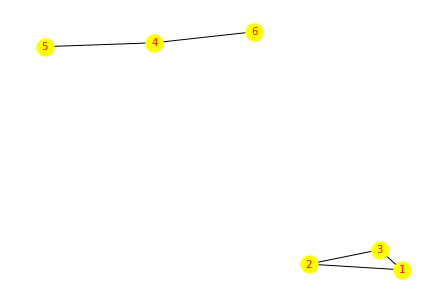

In [68]:
G = nx.Graph()
# Add edges to the graph to create two disconnected components
G.add_edges_from([(1, 2), (1, 3), (2, 3)])
G.add_edges_from([(4, 5), (4, 6)])
# Draw the graph to visualize the disconnected components
nx.draw(G,with_labels=True,font_color='red',font_size=10,node_color='yellow')
plt.show()

In [69]:
# Set the damping factor
damping_factor = 0.85
# Set the teleportation probability
teleportation_prob = 0.15
# Compute the PageRank scores
scores = nx.pagerank(G, alpha=teleportation_prob, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
# Print the scores
print(scores)

{1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.18840554947916666, 5: 0.15579722526041667, 6: 0.15579722526041667}


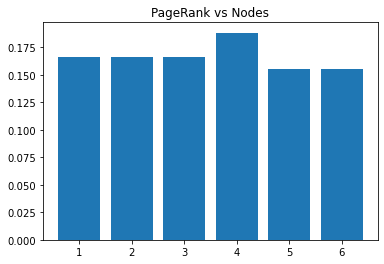

In [70]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

## Handling "Teleportation" or "Random Jumps" 

Handling teleportation and random jumps in the PageRank algorithm is important because it allows the algorithm to escape from local optima and converge to a global solution.

Teleportation is the process of jumping from a node to a randomly chosen node in the graph. The probability of teleporting from a node to any other node is controlled by the damping factor, which is a value between 0 and 1 that represents the probability of staying at the current node, or jumping to a random node.

The damping factor is often set to 0.85, which means that there is a 85% chance of staying at the current node and a 15% chance of jumping to a random node.

This can be done by adding a teleportation probability to the transition matrix. The teleportation probability represents the probability that the random surfer will jump to a random page, rather than following links in the graph.

The NetworkX library's pagerank() function allows you to specify the teleportation probability using the alpha parameter. By default, the alpha parameter is set to 0.85, which means that there is a 85% chance that the random surfer will follow a link and a 15% chance that it will jump to a random page.
You can adjust the teleportation probability to suit the specific needs of your graph, a higher teleportation probability will cause the algorithm to converge more quickly, but it will also decrease the accuracy of the PageRank scores.

It's important to note that, when dealing with teleportation probability, you have to consider the case where the graph has disconnected components, the teleportation probability can be used to redistribute the mass of disconnected nodes to the rest of the graph, this allows to give a probability mass to the disconnected nodes.

#### Graph 1:

In [71]:
# Set the teleportation probability
teleportation_prob = 0.15
# Compute the PageRank scores
scores = nx.pagerank(graph1, alpha=teleportation_prob)
# Print the scores
print(scores)

{0: 0.026196107143403927, 1: 0.026441701087240112, 2: 0.02693749377314539, 3: 0.027442581874325273, 4: 0.026441701087240112, 5: 0.026441701087240112, 6: 0.02974698565994196, 7: 0.028814733798760293, 8: 0.026946789188419997, 10: 0.02974698565994196, 11: 0.026441701087240112, 12: 0.027813853011675133, 13: 0.028814733798760293, 17: 0.02693749377314539, 19: 0.02693749377314539, 21: 0.02693749377314539, 31: 0.03399801981440087, 30: 0.028039263979678607, 9: 0.02670119524458381, 27: 0.02879693023198593, 28: 0.02670119524458381, 32: 0.04548197232434091, 16: 0.03198031794103921, 33: 0.07245409705020923, 14: 0.026196107143403927, 15: 0.026196107143403927, 18: 0.026196107143403927, 20: 0.026196107143403927, 22: 0.026196107143403927, 23: 0.026196107143403927, 25: 0.028291842130806048, 29: 0.02894675931436921, 24: 0.026196107143403927, 26: 0.026196107143403927}


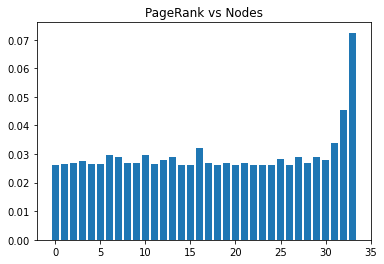

In [72]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

In [81]:
# Create a directed graph
G = graph1
# Define the stopping criterion
tol = 1e-8

# Initialize the pagerank scores and the number of iterations
scores = dict.fromkeys(G, 1/G.number_of_nodes())
iterations = []

# Iterate until convergence
while True:
    new_scores = nx.pagerank(G, personalization=scores, alpha=teleportation_prob)
    if max([abs(new_scores[n] - scores[n]) for n in G]) < tol:
        break
    scores = new_scores
    iterations.append(len(iterations) + 1)

print("Number of iterations",len(iterations))

Number of iterations 63004


#### Graph 2:

In [73]:
# Set the teleportation probability
teleportation_prob = 0.15
# Compute the PageRank scores
scores = nx.pagerank(graph2, alpha=teleportation_prob)
# Print the scores
print(scores)

{23: 0.028818433405952526, 14: 0.030593862982558617, 10: 0.0305166703922714, 13: 0.03329560364261137, 24: 0.031597366656292494, 17: 0.035456996170653565, 12: 0.03527688012665005, 9: 0.042342575224273704, 4: 0.04294467742851403, 5: 0.028818433405952526, 22: 0.03693909390416821, 30: 0.028818433405952526, 6: 0.028818433405952526, 25: 0.028818433405952526, 8: 0.028818433405952526, 15: 0.028818433405952526, 7: 0.028818433405952526, 21: 0.028818433405952526, 28: 0.028818433405952526, 29: 0.03372273597553399, 19: 0.028818433405952526, 26: 0.03264203971151289, 31: 0.028818433405952526, 16: 0.030696786436274912, 27: 0.030696786436274912, 3: 0.028818433405952526, 18: 0.028818433405952526, 1: 0.03454612360526435, 0: 0.028818433405952526, 2: 0.028818433405952526, 20: 0.028818433405952526, 11: 0.028818433405952526}


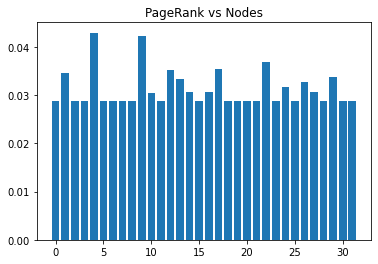

In [74]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

In [82]:
# Create a directed graph
G = graph2
# Define the stopping criterion
tol = 1e-8

# Initialize the pagerank scores and the number of iterations
scores = dict.fromkeys(G, 1/G.number_of_nodes())
iterations = []

# Iterate until convergence
while True:
    new_scores = nx.pagerank(G, personalization=scores, alpha=teleportation_prob)
    if max([abs(new_scores[n] - scores[n]) for n in G]) < tol:
        break
    scores = new_scores
    iterations.append(len(iterations) + 1)

print("Number of iterations",len(iterations))

Number of iterations 13334


#### Graph 3:

In [75]:
# Set the teleportation probability
teleportation_prob = 0.15
# Compute the PageRank scores
scores = nx.pagerank(graph3, alpha=teleportation_prob)
# Print the scores
print(scores)

{3: 0.059356802949999996, 5: 0.068260321975, 4: 0.06437244557999999, 11: 0.06642951229249999, 6: 0.0713689833925, 14: 0.061404605905, 12: 0.061404605905, 10: 0.059356802949999996, 7: 0.062324642624999996, 13: 0.06699898476249999, 0: 0.06905605147499999, 8: 0.0850258048, 1: 0.0639621404125, 2: 0.06856747787499999, 9: 0.0721108171}


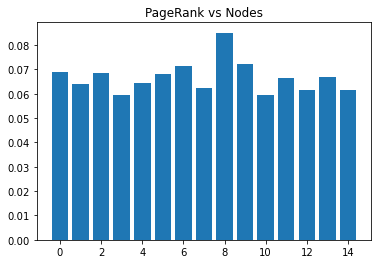

In [76]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.title("PageRank vs Nodes")
plt.show()

In [83]:
# Create a directed graph
G = graph3
# Define the stopping criterion
tol = 1e-8

# Initialize the pagerank scores and the number of iterations
scores = dict.fromkeys(G, 1/G.number_of_nodes())
iterations = []

# Iterate until convergence
while True:
    new_scores = nx.pagerank(G, personalization=scores, alpha=teleportation_prob)
    if max([abs(new_scores[n] - scores[n]) for n in G]) < tol:
        break
    scores = new_scores
    iterations.append(len(iterations) + 1)

print("Number of iterations",len(iterations))

Number of iterations 63178
